# Math 725 Advanced Linear Algebra
## Space filling Curves


### Brent A. Thorne

brentathorne@gmail.com

##### Coordinate functional space

In [1]:
# import libraries
import numpy as np
import sympy as sym
from sympy.matrices import Matrix
from sympy import I
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from sympy import init_printing
init_printing()

## Hilbert Curve
Open with a semimanual process then generalize

In [2]:
def m_plot(P):
    p=np.array(P.tolist())
    x=p[0]
    y=p[1]
    plt.plot(x,y)
    plt.scatter(x,y)
    plt.scatter(x[0],y[0],c='pink')
    plt.grid(visible=True);
    plt.gca().set_aspect("equal") # square grids are pretty
    plt.axhline(0, color='black', alpha = .2, linestyle='--')
    plt.axvline(0, color='black', alpha = .2, linestyle='--')

⎡-1  -1  1  1 ⎤
⎢             ⎥
⎣-1  1   1  -1⎦

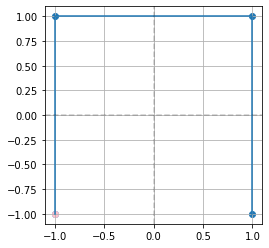

In [3]:
P=Matrix([[-1,-1],[-1,1],[1,1],[1,-1]]).T
m_plot(P)
P

⎛⎡-1  -1  1  1 ⎤  ⎡-1  1   1  -1⎤⎞
⎜⎢             ⎥, ⎢             ⎥⎟
⎝⎣-1  1   1  -1⎦  ⎣-1  -1  1  1 ⎦⎠

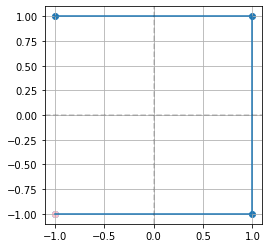

In [4]:
# rotate
R = Matrix([[0,1],[1,0]])
m_plot(R*P)
P, R*P

# shift left and shift down... ought to have opened with an affine matrix
# let's do that again...

## Generalized Hilbert

⎡-1/2  -1/2  1/2  1/2 ⎤
⎢                     ⎥
⎢-1/2  1/2   1/2  -1/2⎥
⎢                     ⎥
⎢ 0     0     0    0  ⎥
⎢                     ⎥
⎣ 1     1     1    1  ⎦

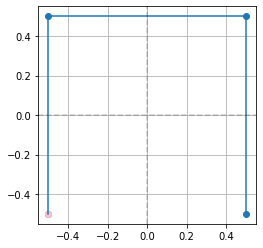

In [5]:
# let's begin again this time with a 3D affine transformation so we don't have to do this thrice 
T = Matrix([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1]
])

# Now our 2D shape, we'll save that 3rd dim for later
P = sym.Rational(1,2)*Matrix([[-1,-1],[-1,1],[1,1],[1,-1]]).T #make normal unit square
P = P.col_join(sym.zeros(1,P.shape[1]))
P = P.col_join(sym.ones(1,P.shape[1]))
m_plot(T*P)
T*P

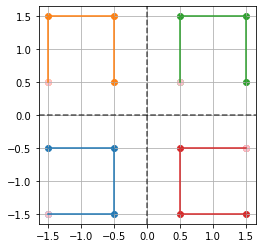

In [6]:
R = Matrix([
    [0,1,0,0],
    [1,0,0,0],
    [0,0,1,0],
    [0,0,0,1]
]) # actaully this is a reflect and rotate


S_1 = Matrix([
    [1,0,0,-1],
    [0,1,0,-1],
    [0,0,1,0],
    [0,0,0,1]
])
m_plot(S_1*R*P) #reflect/rotate and shift left and down

S_2 = Matrix([
    [1,0,0,-1],
    [0,1,0,1],
    [0,0,1,0],
    [0,0,0,1]
])

m_plot(S_2*P) # shift left and up

S_3 = Matrix([
    [1,0,0,1],
    [0,1,0,1],
    [0,0,1,0],
    [0,0,0,1]
])

m_plot(S_3*P) # shift right and up

S_4 = Matrix([
    [1,0,0,1],
    [0,1,0,-1],
    [0,0,1,0],
    [0,0,0,1]
])

R_0 = Matrix([
    [0,-1,0,0],
    [-1,0,0,0],
    [0,0,1,0],
    [0,0,0,1]
]) # infinite monkeys

m_plot(S_4*R_0*P)

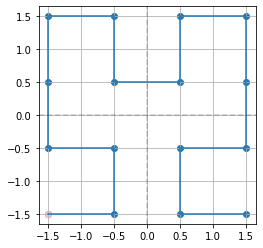

In [7]:
# my monkey
s=sym.Rational(1,2)
x = P

X = S_1*R*x
X = X.row_join(S_2*x)
X = X.row_join(S_3*x)
X = X.row_join(S_4*R_0*x)

m_plot(X)

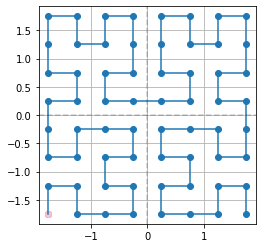

In [8]:
# release the monkeys
N = s*Matrix([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1/s]
]) # normalize back to unit square 
P1=N*X

x = P1
X = S_1*R*x
X = X.row_join(S_2*x)
X = X.row_join(S_3*x)
X = X.row_join(S_4*R_0*x)

m_plot(X) 

##### Things to consider:
 * Modify to for $\C$
 * What would a $\C^2\mapsto\R^3\times\R^1$ affine transform look like? The dim seems to check out.

## Gosper Curve

In [9]:
##  Build our basis
# 360/60, 2*sym.pi/6, 2*sym.pi- 2*sym.pi/6

# translate
# rotate -2π/3 and translate
# rotate -5π/3 and translate
# rotate -π/3 and translate
# translate
# rotate 2π/3 and translate

z = 2*sym.pi*sym.I/6
p0 = 0
p1 = p0+sym.exp(sym.pi*sym.I/2)
p2 = p1+sym.exp(z/2)
p3 = p2+sym.exp(-sym.pi*sym.I/2)
p4 = p3+sym.exp(-z/2)
p5 = p4+sym.exp(sym.pi*sym.I/2)
p6 = p5+sym.exp(sym.pi*sym.I/2)
p7 = p6+sym.exp(5*z/2)
# now fix up the Hilbert curve for complex affine transforms

In [10]:
p = [p0, p1, p2, p3, p4, p5, p6, p7]
p

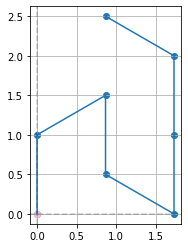

In [11]:
P=Matrix([[sym.re(pp), sym.im(pp)]for pp in p]).T
m_plot(P)

##### Things to consider:
 * Permutation of basis for next interation
 * Geneneralized generator for all possible space filling curves